<a href="https://colab.research.google.com/github/guptajaya181/realtime_gender_and_age_detection/blob/main/gender_and_age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First we will clone our github

In [2]:
!git clone https://github.com/guptajaya181/realtime_gender_and_age_detection

Cloning into 'realtime_gender_and_age_detection'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 1), reused 18 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), done.


**Importing the required libraries**

In [3]:
import cv2
import math
from google.colab.patches import cv2_imshow

In [8]:
faceprototype = "/content/realtime_gender_and_age_detection/opencv_face_detector.pbtxt"
face_model = "/content/realtime_gender_and_age_detection/opencv_face_detector_uint8.pb"

genderprototype = "/content/realtime_gender_and_age_detection/gender_deploy.prototxt"
gender_model = "/content/realtime_gender_and_age_detection/gender_net.caffemodel"

ageprototype = "/content/realtime_gender_and_age_detection/age_deploy.prototxt"
age_model = "/content/realtime_gender_and_age_detection/age_net.caffemodel"

In [9]:
# Loading the network

face_net = cv2.dnn.readNet(face_model,faceprototype)
gender_net = cv2.dnn.readNet(gender_model,genderprototype)
age_net = cv2.dnn.readNet(age_model,ageprototype)

In [10]:
# Specifying the model mean value

model_mean_value = (78.4263377603, 87.7689143744, 114.895847746)

gender_list = ["Male","Female"]
age_list = ['(0-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']

**This Function mainly makes a frame and reads from face detectector**

In [11]:
def frame_face_box(net,frame):
    frWidth = frame.shape[1]
    frHeight = frame.shape[0]
    ar = []
    blob = cv2.dnn.blobFromImage(frame, 1.0, (227,227), [104.0,117.0,123.0], swapRB=False)
    net.setInput(blob)
    detect = net.forward()
    for b in range(detect.shape[2]):
        threshold = detect[0,0,b,2]
        if threshold > 0.7:
            a1 = int(detect[0,0,b,3]*frWidth)
            b1 = int(detect[0,0,b,4]*frHeight)
            a2 = int(detect[0,0,b,5]*frWidth)
            b2 = int(detect[0,0,b,6]*frHeight)
            ar.append([a1,b1,a2,b2])
            cv2.rectangle(frame,(a1,b1),(a2,b2),(0,255,0),1)
    print(detect)
    return frame, ar


In [12]:
padding = 20

In [13]:
# Preprocessing and detecting the face 

def detector(frame):
    frame,box = frame_face_box(face_net,frame)
    for b in box:
        f = frame[max(0,b[1]-padding):min(b[3]+padding, frame.shape[0]-1),max(0,b[0]-padding):min(b[2]+padding, frame.shape[1]-1)]   
        # This is to extract the face from the frame we created
        blob = cv2.dnn.blobFromImage(f, 1.0, (227,227), model_mean_value, swapRB=False)
        gender_net.setInput(blob)
        g_pred = gender_net.forward()
        gender = gender_list[g_pred[0].argmax()]
        age_net.setInput(blob)
        a_pred = age_net.forward()
        age = age_list[a_pred[0].argmax()]
            
        label = "{},{}".format(gender,age)
        cv2.putText(frame, label, (b[0],b[1]-10),cv2.FONT_HERSHEY_PLAIN,0.8, (255,255,255), 1)
    return frame

[[[[0.         1.         0.99634284 ... 0.3647179  0.59173316
    0.5504382 ]
   [0.         1.         0.12797995 ... 0.17339602 5.251201
    1.1547424 ]
   [0.         1.         0.1271795  ... 0.7147933  0.7207507
    0.75052524]
   ...
   [0.         1.         0.10159827 ... 0.82931435 0.8086716
    0.8769119 ]
   [0.         1.         0.10146298 ... 0.6293313  0.67982227
    0.68145865]
   [0.         1.         0.10117936 ... 0.54713225 0.70557284
    0.61058056]]]]


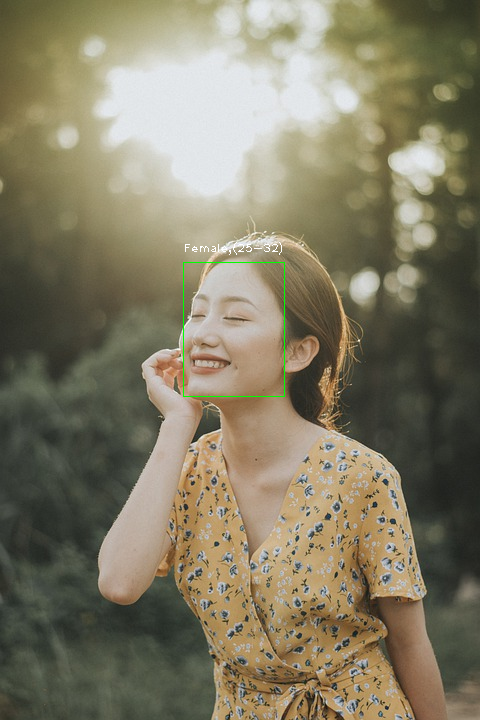

In [15]:
image = cv2.imread("/content/realtime_gender_and_age_detection/girl1.jpg")
output = detector(image)
cv2_imshow(output)

[[[[0.         1.         0.8227266  ... 0.11680788 0.6949605
    0.6289692 ]
   [0.         1.         0.12716293 ... 3.9716446  5.0718765
    5.2726746 ]
   [0.         1.         0.11947581 ... 3.9759192  1.0993047
    5.276057  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


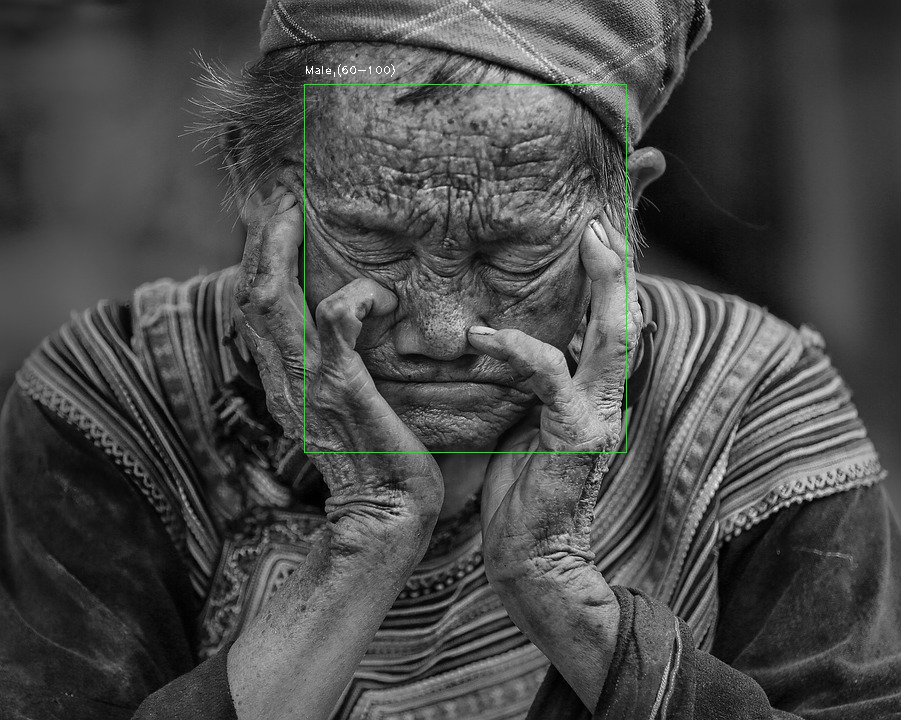

In [16]:
image = cv2.imread("/content/realtime_gender_and_age_detection/man1.jpg")
output = detector(image)
cv2_imshow(output)

[[[[0.         1.         0.99985266 ... 0.21843787 0.70426
    0.5646393 ]
   [0.         1.         0.12808912 ... 3.9742332  5.0759516
    5.2694325 ]
   [0.         1.         0.12492326 ... 3.968544   1.1022284
    5.273815  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


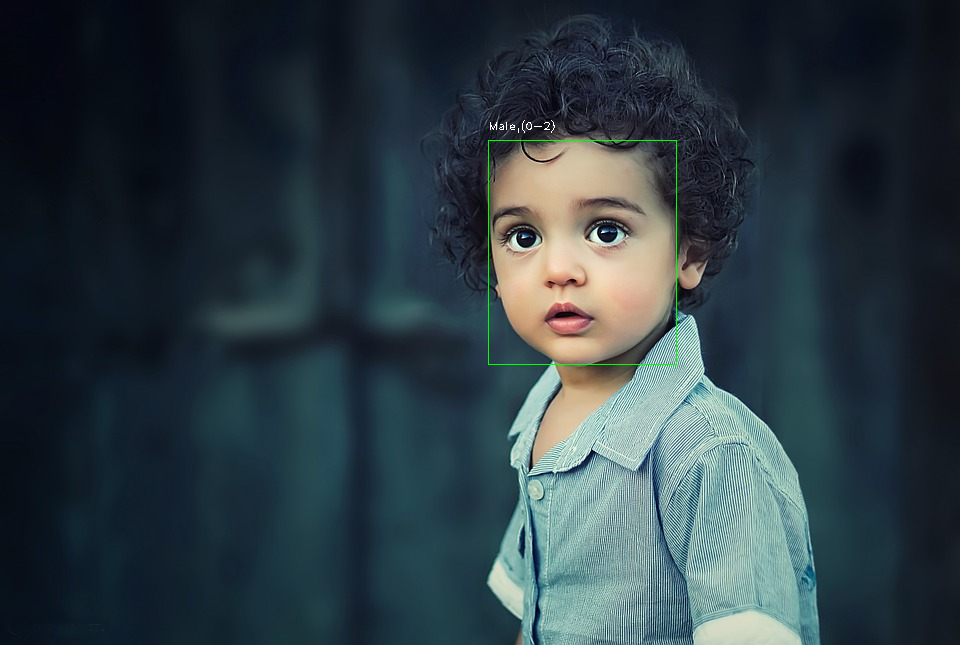

In [17]:
image = cv2.imread("/content/realtime_gender_and_age_detection/kid1.jpg")
output = detector(image)
cv2_imshow(output)

In [18]:
# To see real time gender and age detection we connect with the webcam using cv2

In [ ]:
video = cv2.VideoCapture(0)
while(video.isOpened()):
    
    while True:
        ret, frame = video.read()
        frame = detector(frame)
        cv2.imshow('img',frame)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    video.release()
    cv2.destroyAllWindows()
    video.stop()